In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [5]:
data=pd.read_csv("/kaggle/input/algo-trading-data-nifty-100-data-with-indicators/ADANIENT_5minute_data.csv",index_col="date",parse_dates=["date"])
data.head(20)
data.tail(20)

,Unnamed: 0,close,high,low,open,volume
date,,,,,,
2022-10-21 13:50:00+05:30,135018,3317.50,3319.50,3311.05,3316.50,9418
2022-10-21 13:55:00+05:30,135019,3314.15,3319.25,3311.00,3319.25,5650
2022-10-21 14:00:00+05:30,135020,3300.00,3315.35,3299.60,3315.35,25397
2022-10-21 14:05:00+05:30,135021,3290.00,3303.00,3288.80,3299.25,27822
2022-10-21 14:10:00+05:30,135022,3305.40,3307.65,3287.05,3290.00,28060
2022-10-21 14:15:00+05:30,135023,3312.00,3313.00,3297.55,3305.40,23963
2022-10-21 14:20:00+05:30,135024,3304.55,3313.85,3300.05,3312.95,13259
2022-10-21 14:25:00+05:30,135025,3290.85,3306.00,3288.60,3304.55,15122
2022-10-21 14:30:00+05:30,135026,3301.95,3302.85,3288.00,3290.85,14229


In [6]:
data.drop(["Unnamed: 0"],inplace=True,axis=1)
data.head(30)


,close,high,low,open,volume
date,,,,,
2015-02-02 09:15:00+05:30,647.00,662.30,646.90,646.90,727362
2015-02-02 09:20:00+05:30,648.25,652.00,642.00,647.50,331507
2015-02-02 09:25:00+05:30,646.30,648.35,641.90,648.00,159147
2015-02-02 09:30:00+05:30,649.15,649.65,645.90,646.50,116290
2015-02-02 09:35:00+05:30,653.95,657.75,649.40,649.40,351595
2015-02-02 09:40:00+05:30,652.75,654.25,652.00,653.80,187397
2015-02-02 09:45:00+05:30,653.00,653.60,651.00,652.80,94755
2015-02-02 09:50:00+05:30,652.90,656.00,652.00,653.00,163686
2015-02-02 09:55:00+05:30,652.80,653.75,651.10,652.90,125745


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135038 entries, 2015-02-02 09:15:00+05:30 to 2022-10-21 15:25:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   close   135038 non-null  float64
 1   high    135038 non-null  float64
 2   low     135038 non-null  float64
 3   open    135038 non-null  float64
 4   volume  135038 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.2 MB


In [8]:
# from datetime import datetime
# data["date"]= pd.to_datetime(data["date"],format='%Y%m%d %H:%M:%S')

In [9]:
data.corr()

,close,high,low,open,volume
close,1.000000,0.999997,0.999997,0.999994,-0.078495
high,0.999997,1.000000,0.999995,0.999997,-0.078051
low,0.999997,0.999995,1.000000,0.999996,-0.079035
open,0.999994,0.999997,0.999996,1.000000,-0.078580
volume,-0.078495,-0.078051,-0.079035,-0.078580,1.000000


In [10]:
data_open=data["open"]
data_close=data["close"]
data_vol=data["volume"]

<AxesSubplot:xlabel='volume', ylabel='Count'>

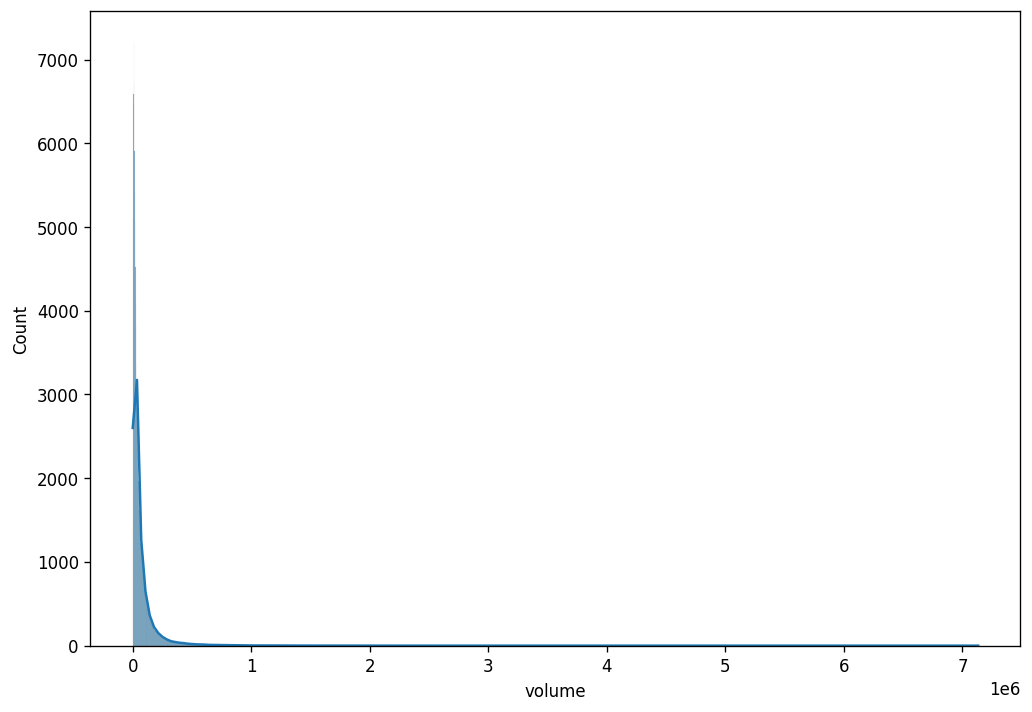

In [11]:
sns.histplot(data=data_vol,kde=True)

In [12]:
data_vol.describe()

count    1.350380e+05
mean     7.416676e+04
std      1.594414e+05
min      0.000000e+00
25%      1.444000e+04
50%      3.239050e+04
75%      7.587025e+04
max      7.133324e+06
Name: volume, dtype: float64

In [13]:
mean_vol=data_vol.mean()
std_vol=data_vol.std()
data_vol_z_score=(((data_vol-mean_vol)/std_vol))

<AxesSubplot:xlabel='date'>

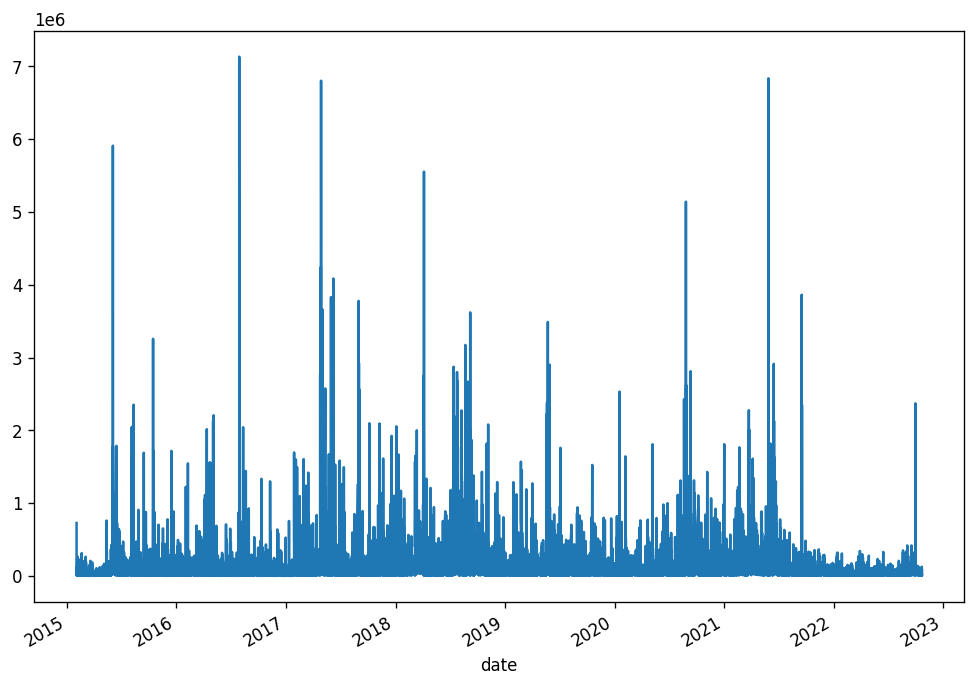

In [14]:
data_vol.plot()

<AxesSubplot:xlabel='date'>

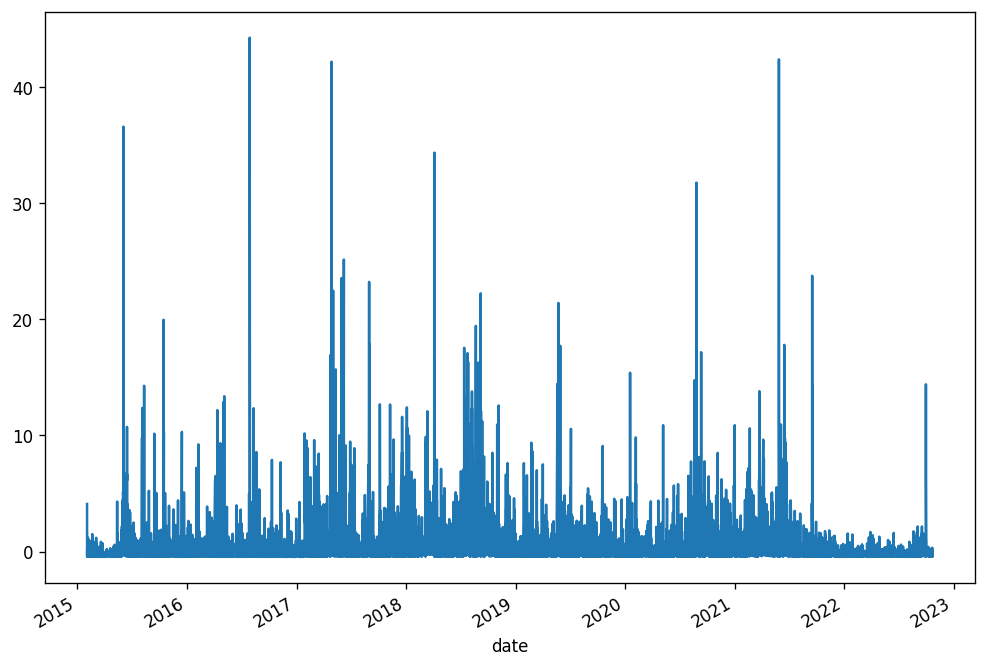

In [15]:
data_vol_z_score.plot()

In [16]:
import math

In [17]:
data_vol[0]

727362

In [18]:
data_vol.head(10)

date
2015-02-02 09:15:00+05:30    727362
2015-02-02 09:20:00+05:30    331507
2015-02-02 09:25:00+05:30    159147
2015-02-02 09:30:00+05:30    116290
2015-02-02 09:35:00+05:30    351595
2015-02-02 09:40:00+05:30    187397
2015-02-02 09:45:00+05:30     94755
2015-02-02 09:50:00+05:30    163686
2015-02-02 09:55:00+05:30    125745
2015-02-02 10:00:00+05:30     87968
Name: volume, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='date'>

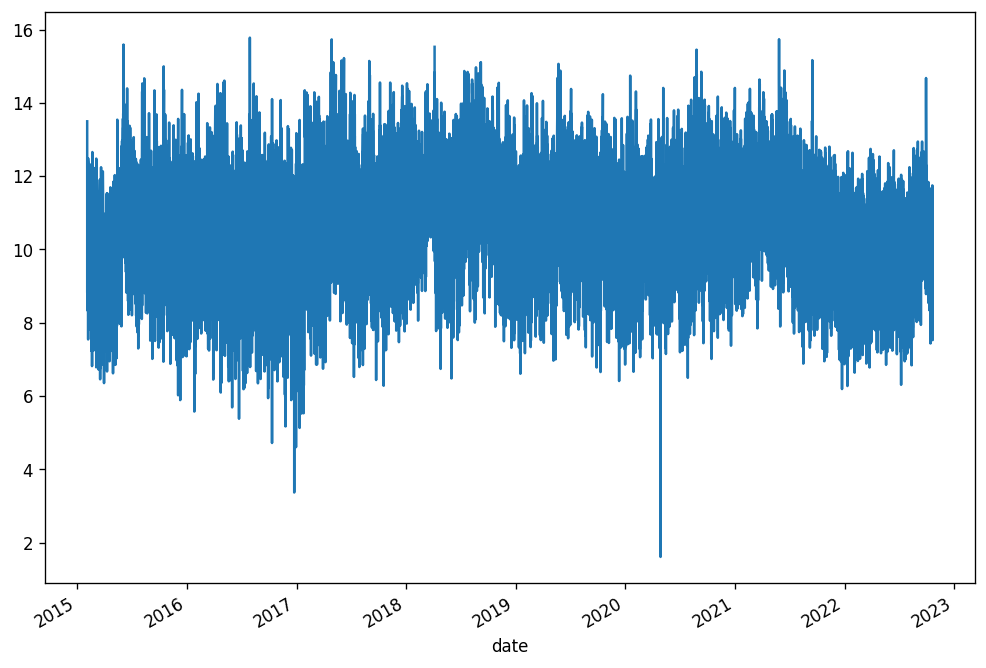

In [19]:
# for x in range(data_vol): data_vol_log=math.log10(data_vol[x])
data_vol_log=np.log(data_vol)
data_vol_log.plot()

<AxesSubplot:xlabel='volume', ylabel='Count'>

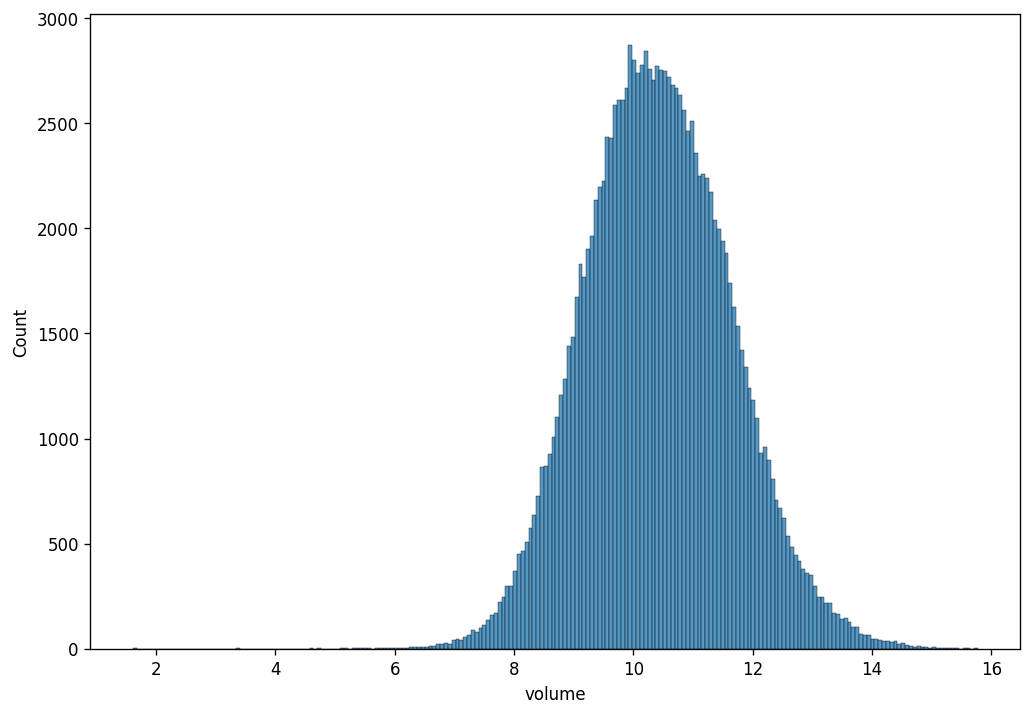

In [20]:
sns.histplot(data=(data_vol_log))

In [21]:
data_vol_log.describe()

count    1.350380e+05
mean             -inf
std               NaN
min              -inf
25%      9.577757e+00
50%      1.038562e+01
75%      1.123678e+01
max      1.578029e+01
Name: volume, dtype: float64

In [22]:
data_new=data
data_new["volume"]=data_vol_log

In [23]:
data_new.head(20)

,close,high,low,open,volume
date,,,,,
2015-02-02 09:15:00+05:30,647.00,662.30,646.90,646.90,13.497180
2015-02-02 09:20:00+05:30,648.25,652.00,642.00,647.50,12.711404
2015-02-02 09:25:00+05:30,646.30,648.35,641.90,648.00,11.977584
2015-02-02 09:30:00+05:30,649.15,649.65,645.90,646.50,11.663842
2015-02-02 09:35:00+05:30,653.95,657.75,649.40,649.40,12.770235
2015-02-02 09:40:00+05:30,652.75,654.25,652.00,653.80,12.140985
2015-02-02 09:45:00+05:30,653.00,653.60,651.00,652.80,11.459050
2015-02-02 09:50:00+05:30,652.90,656.00,652.00,653.00,12.005705
2015-02-02 09:55:00+05:30,652.80,653.75,651.10,652.90,11.742011


<AxesSubplot:xlabel='date'>

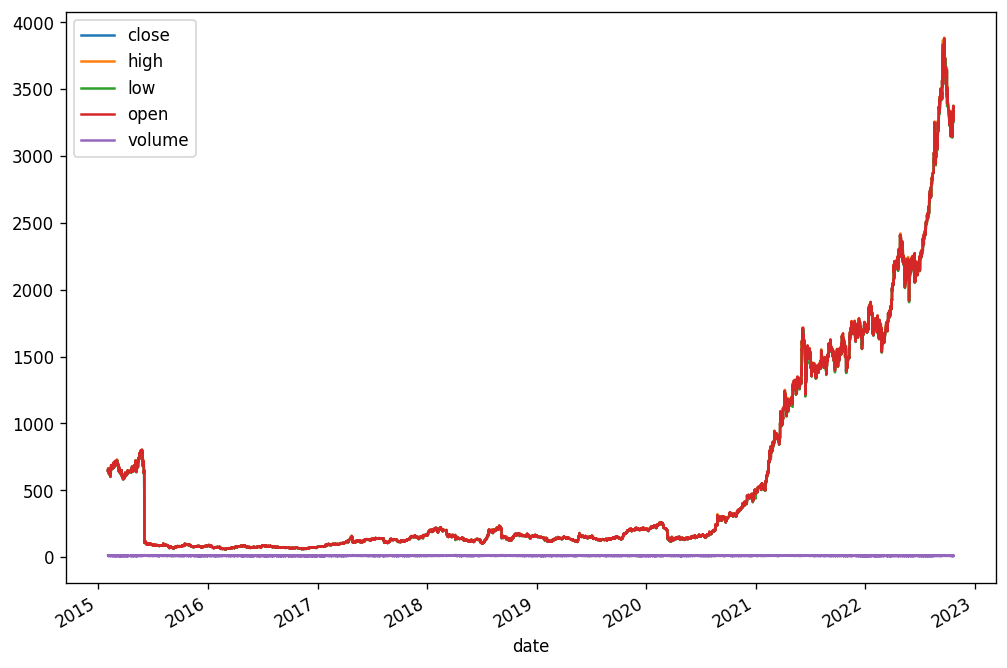

In [24]:
data_new.plot()

In [25]:
type(data_vol)

pandas.core.series.Series

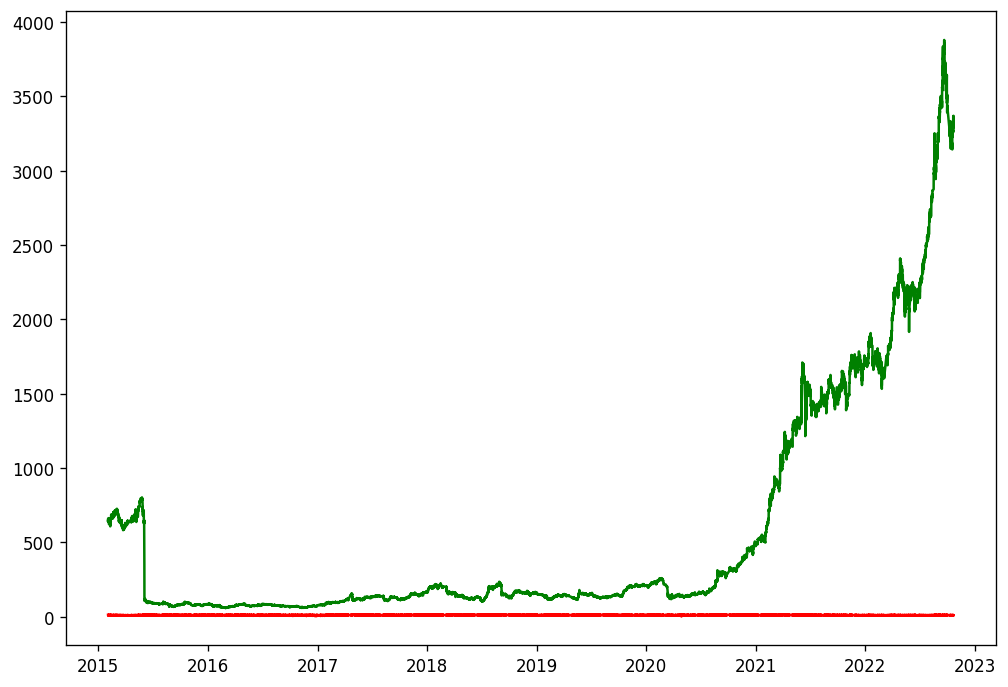

In [26]:
# sns.scatterplot(data.index,y=data.high)
figure,axis=plt.subplots()
plt.plot(data_vol_log.index,data_vol_log,c='red')
plt.plot(data.index,data.close,c='green')
plt.show()


<AxesSubplot:xlabel='date', ylabel='low'>

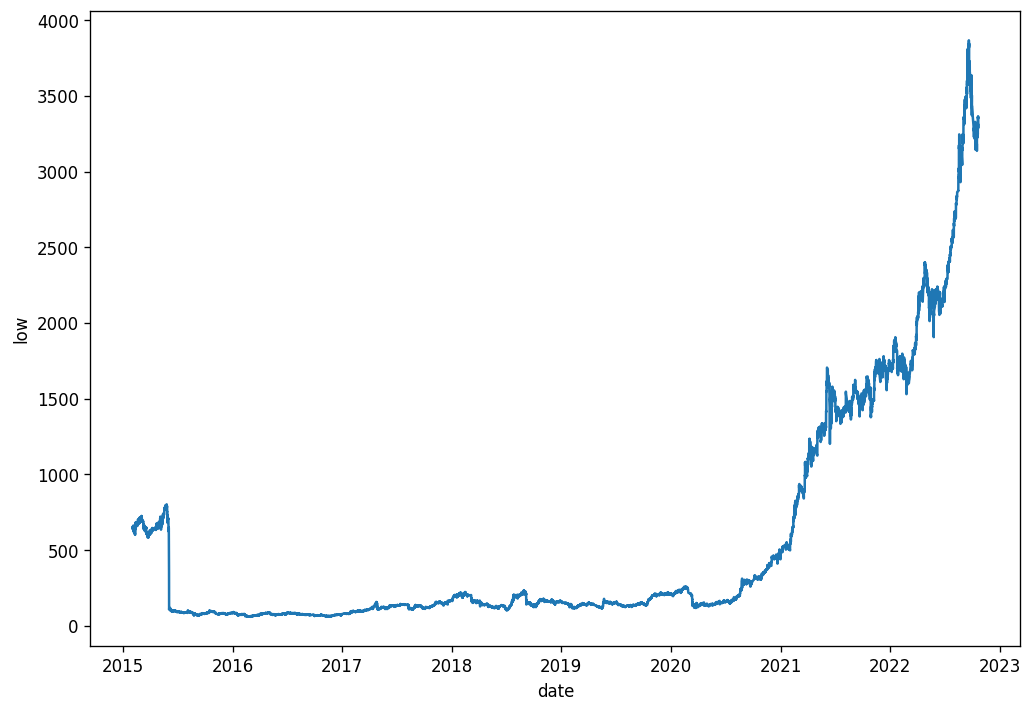

In [27]:
sns.lineplot(x=data.index,y=data.low)

In [28]:
data_new.head(10)

,close,high,low,open,volume
date,,,,,
2015-02-02 09:15:00+05:30,647.00,662.30,646.9,646.9,13.497180
2015-02-02 09:20:00+05:30,648.25,652.00,642.0,647.5,12.711404
2015-02-02 09:25:00+05:30,646.30,648.35,641.9,648.0,11.977584
2015-02-02 09:30:00+05:30,649.15,649.65,645.9,646.5,11.663842
2015-02-02 09:35:00+05:30,653.95,657.75,649.4,649.4,12.770235
2015-02-02 09:40:00+05:30,652.75,654.25,652.0,653.8,12.140985
2015-02-02 09:45:00+05:30,653.00,653.60,651.0,652.8,11.459050
2015-02-02 09:50:00+05:30,652.90,656.00,652.0,653.0,12.005705
2015-02-02 09:55:00+05:30,652.80,653.75,651.1,652.9,11.742011


In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


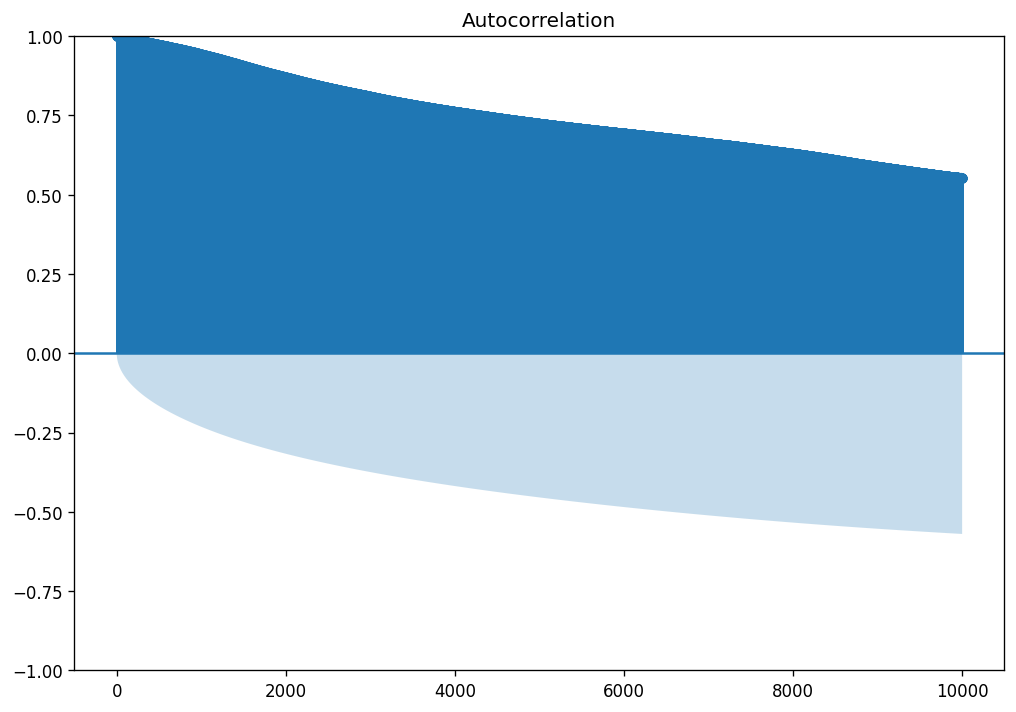

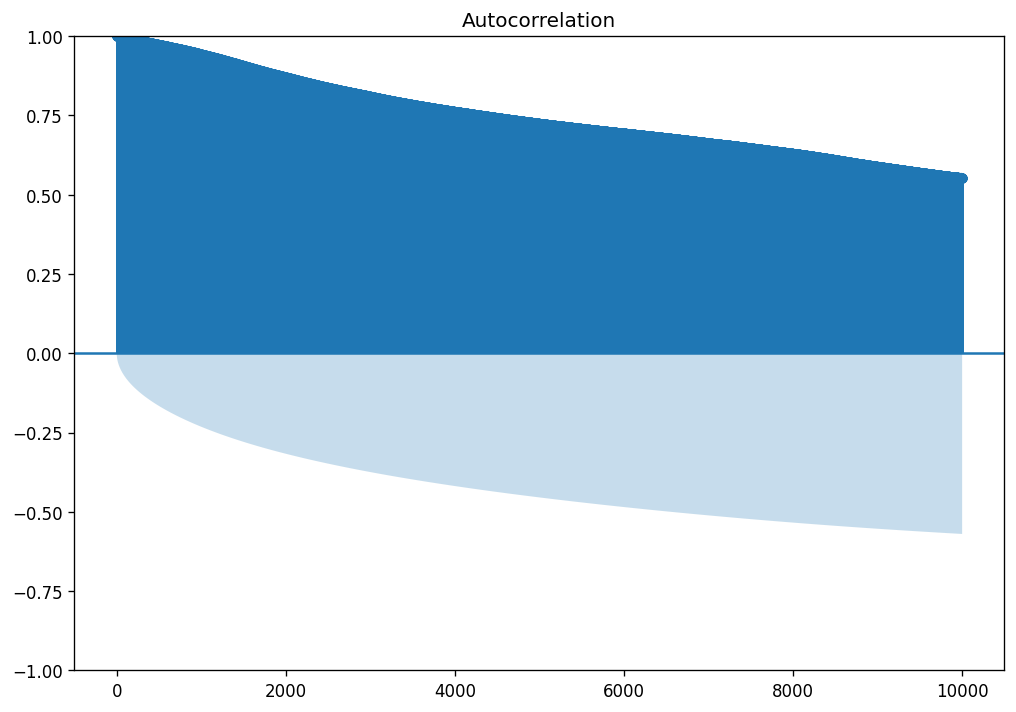

In [48]:
plot_acf(data_close, lags = 9999) 

In [ ]:
plot_pacf(data_close, lags = 9999) 

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
